## Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings

In [9]:
df = pd.read_csv("../data/data.csv")

In [10]:
df.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


## Data Preparation

In [11]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [12]:
df.set_index('DATE',inplace=True)

In [13]:
df.head()

,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
DATE,,,,,
2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


In [14]:
df = df[['NASDAQ.CSCO']]

In [15]:
df

,NASDAQ.CSCO
DATE,
2017-04-03 13:30:00,33.7400
2017-04-03 13:31:00,33.8800
2017-04-03 13:32:00,33.9000
2017-04-03 13:33:00,33.8499
2017-04-03 13:34:00,33.8400
...,...
2017-08-31 19:56:00,32.1850
2017-08-31 19:57:00,32.2000
2017-08-31 19:58:00,32.2000


## Data Visualization

<AxesSubplot:xlabel='DATE'>

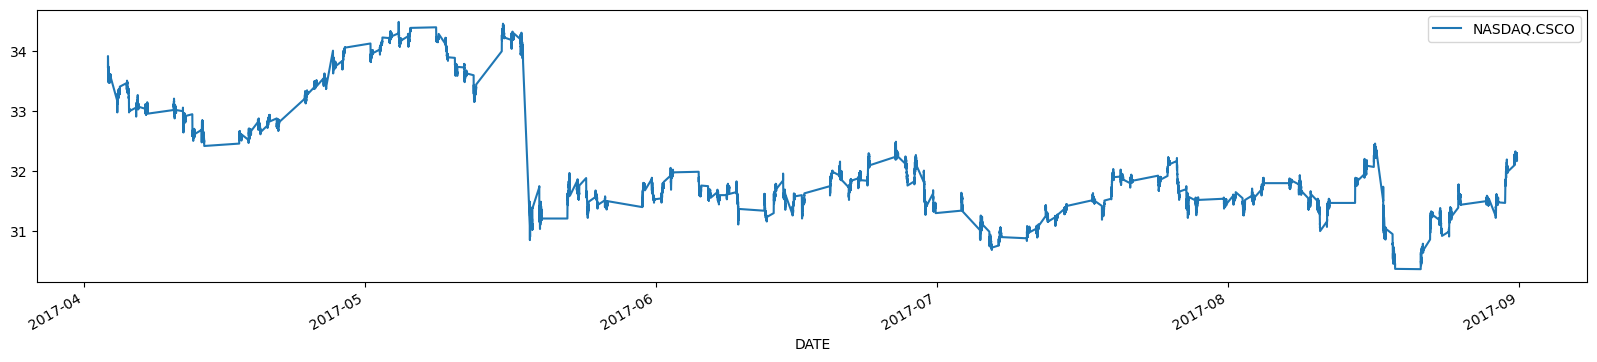

In [16]:
df.plot(figsize=(20,4))

In [17]:
df.index.month_name().unique()

Index(['April', 'May', 'June', 'July', 'August'], dtype='object', name='DATE')

In [18]:
df.index.day_name().unique()

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], dtype='object', name='DATE')

            NASDAQ.CSCO
DATE                   
2017-04-03    33.594227
2017-04-04    33.286203
2017-04-05    33.335374
2017-04-06    33.105804
2017-04-07    33.031789
...                 ...
2017-08-25    31.586380
2017-08-28    31.500441
2017-08-29    31.485930
2017-08-30    31.942218
2017-08-31    32.241696

[109 rows x 1 columns]


<AxesSubplot:xlabel='DATE'>

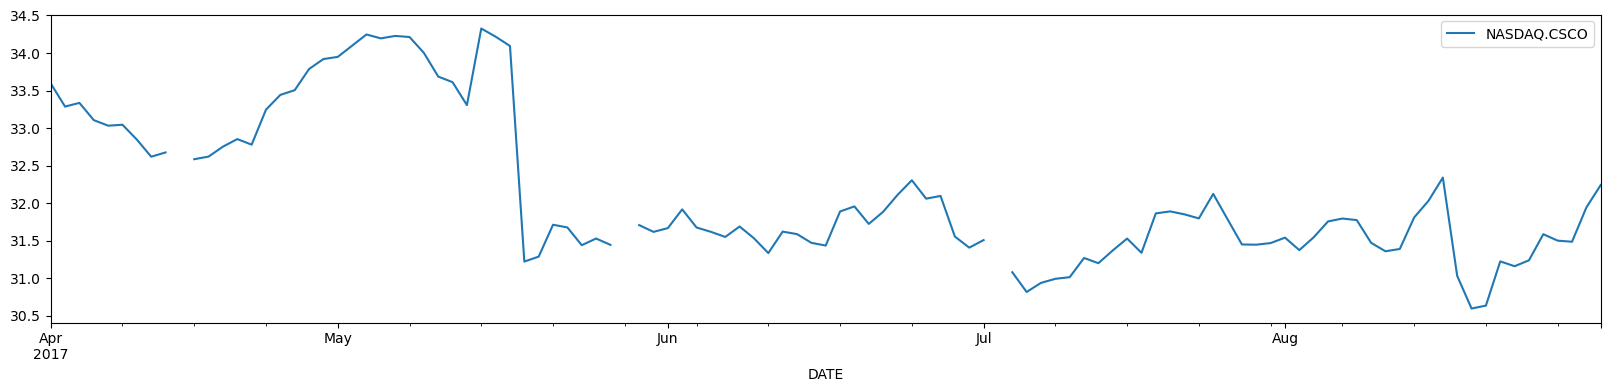

In [19]:
freq='B'
print(df.resample(freq).mean())
df.resample(freq).mean().plot(figsize=(20,4))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


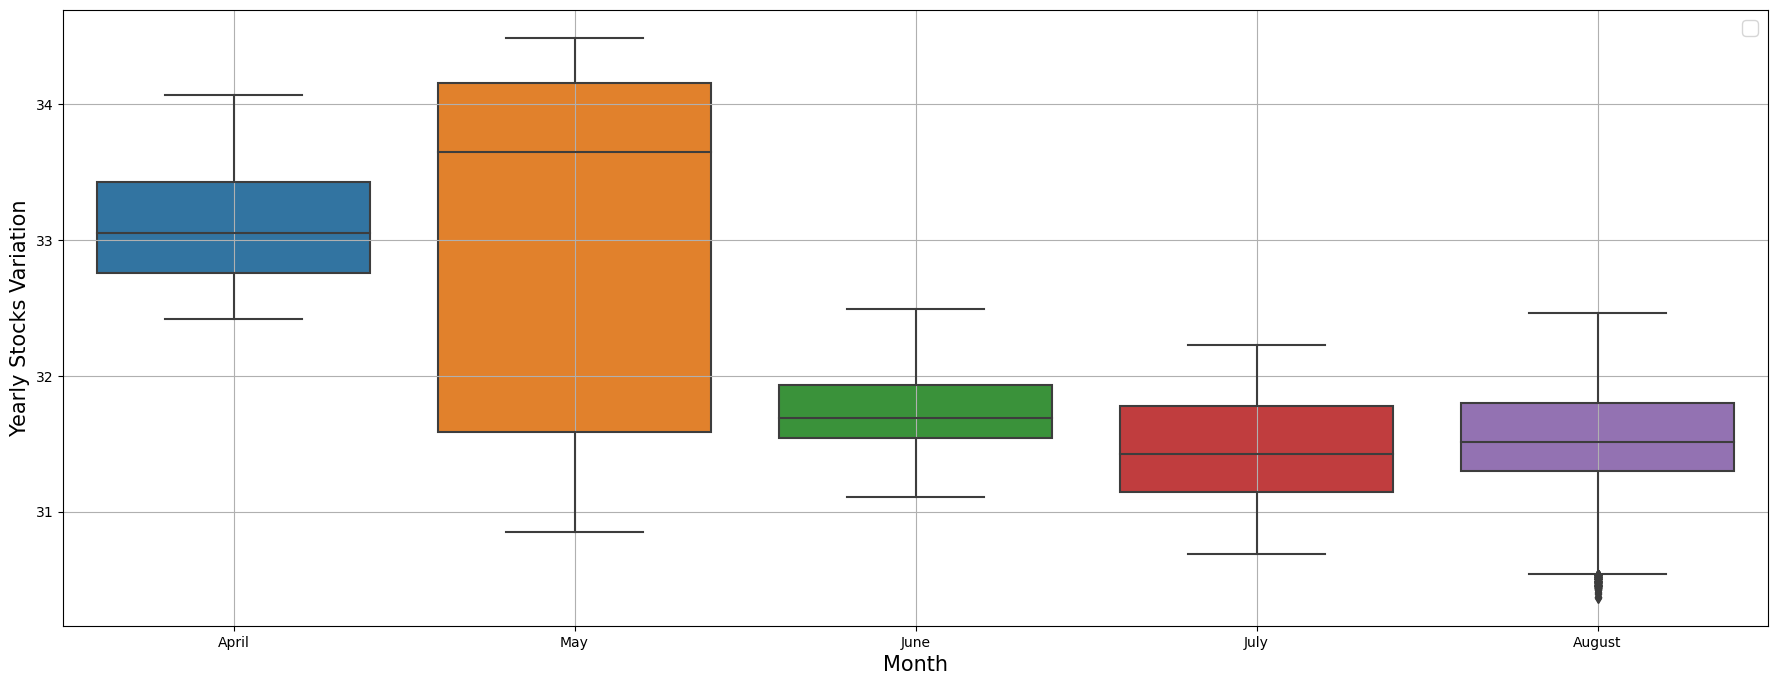

In [20]:
## Monthly Boxplot
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df.values[:,0],ax=ax)

plt.grid()
plt.xlabel('Month',fontsize=15)
plt.ylabel('Yearly Stocks Variation',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

In [21]:
data=df.resample(freq).mean()

In [22]:
data[data['NASDAQ.CSCO'].isnull()]

,NASDAQ.CSCO
DATE,
2017-04-14,NaN
2017-05-29,NaN
2017-07-04,NaN


<AxesSubplot:xlabel='DATE'>

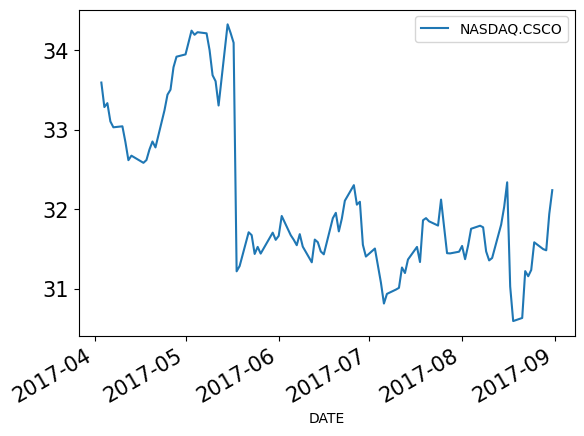

In [23]:
data=data.dropna()
data.plot()

## Decomposition

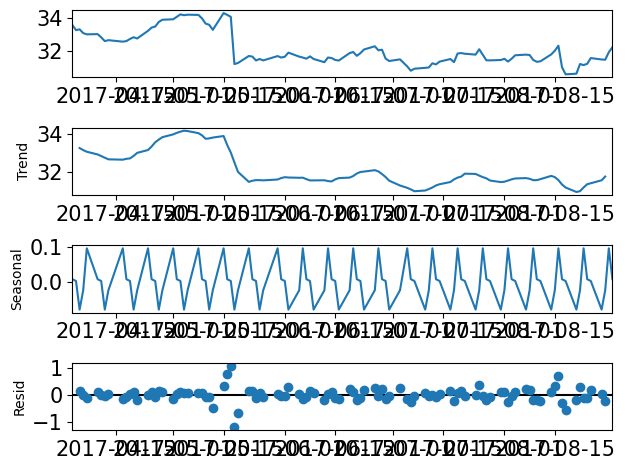

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data,model='additive',period=5).plot()

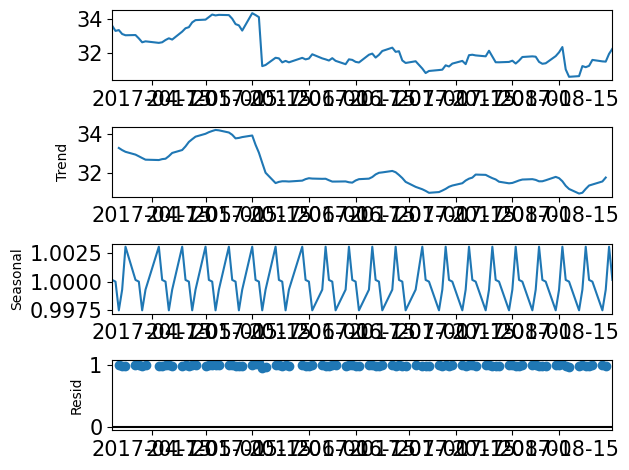

In [25]:
decomposition = seasonal_decompose(data,model='multiplicative',period=5)
decomposition.plot()
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

## Differencing

In [26]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data['NASDAQ.CSCO'])

def adfuller_test(stock):
    result=adfuller(stock)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [28]:
adfuller_test(data['NASDAQ.CSCO'])

ADF Test Statistic : -2.3334218709372077
p-value : 0.16141516508591525
#Lags Used : 0
Number of Observations Used : 105
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [29]:
data['NASDAQ.CSCO First Difference']=data['NASDAQ.CSCO']-data['NASDAQ.CSCO'].shift(1)

In [30]:
adfuller_test(data['NASDAQ.CSCO First Difference'].dropna())

ADF Test Statistic : -7.681331156069203
p-value : 1.5011864319601013e-11
#Lags Used : 2
Number of Observations Used : 102
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## PLOT ACF and PACF

c:\Users\sriva\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


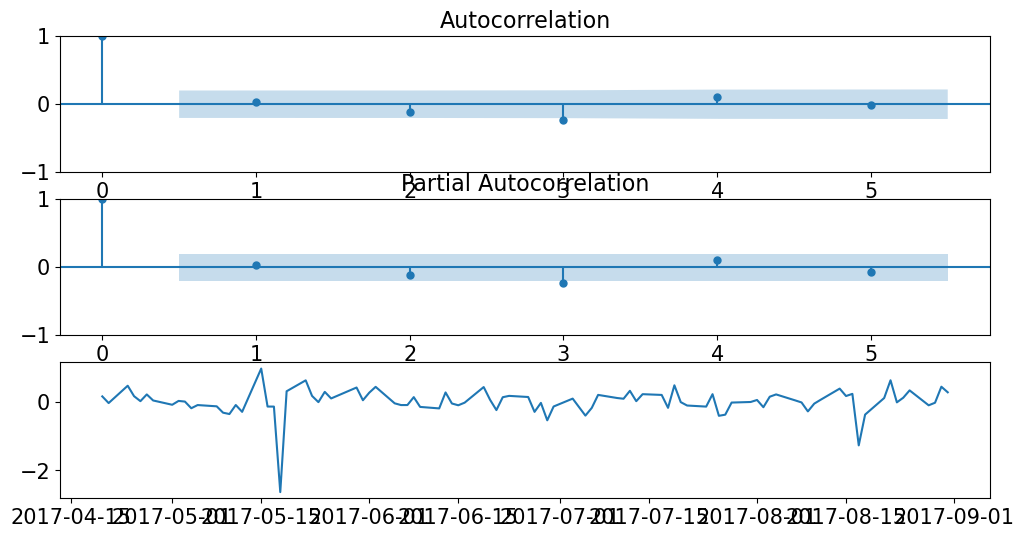

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Stationary data
data['station'] = data['NASDAQ.CSCO'] - data['NASDAQ.CSCO'].rolling(12).mean()

fig, ax = plt.subplots(3, figsize=(12,6))
x = (data.station.dropna() - data.station.dropna().shift(1)).dropna()
ax[0] = plot_acf(x, ax=ax[0], lags=5)
ax[1] = plot_pacf(x, ax=ax[1], lags=5)
ax[2].plot(x)

## Train Test Split

In [32]:
data.drop('NASDAQ.CSCO First Difference',axis=1,inplace=True)
data.drop('station',axis=1,inplace=True)

In [33]:
i=0.80
per=int(data.shape[0]*i)
per

84

In [34]:
train = data.iloc[:int(per+1)]
test = data.iloc[int(per+1):]

In [35]:
print(train.shape[0])
train.tail()

85


,NASDAQ.CSCO
DATE,
2017-07-27,31.449775
2017-07-28,31.446801
2017-07-31,31.468303
2017-08-01,31.540539
2017-08-02,31.374521


In [36]:
print(test.shape[0])
test

21


,NASDAQ.CSCO
DATE,
2017-08-03,31.545197
2017-08-04,31.756668
2017-08-07,31.794939
2017-08-08,31.774647
2017-08-09,31.471949
2017-08-10,31.359102
2017-08-11,31.389531
2017-08-14,31.809120
2017-08-15,32.031269


### pdq value iteration

In [37]:
import itertools
p=range(0,7)
d=range(1,2)
q=range(0,7)

pdq_combination=list(itertools.product(p,d,q))

#### for loop over rmse

In [38]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings('ignore')

In [39]:
order1=[]
rmse=[]

for pdq in pdq_combination:
    try:
        model=ARIMA(train['NASDAQ.CSCO'],order=pdq).fit()
        pred=model.predict(start=train.shape[0],end=(train.shape[0]+test.shape[0]-1),dynamic=True)
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue

results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE']).sort_values('RMSE')
results.head()

,RMSE
"(6, 1, 4)",0.437881
"(4, 1, 2)",0.452278
"(1, 1, 1)",0.452943
"(5, 1, 3)",0.452999
"(0, 1, 3)",0.457285


In [40]:
mod = ARIMA(train['NASDAQ.CSCO'], order=(6,1,4))

results_Arima = mod.fit()

In [41]:
predicted_autoARIMA = results_Arima.predict(start=train.shape[0],end=(train.shape[0]+test.shape[0]-1),dynamic=True)
predicted_autoARIMA=pd.DataFrame(predicted_autoARIMA).set_index(test.index.copy())
predicted_autoARIMA.head()

,predicted_mean
DATE,
2017-08-03,31.417759
2017-08-04,31.486796
2017-08-07,31.554072
2017-08-08,31.547736
2017-08-09,31.523324


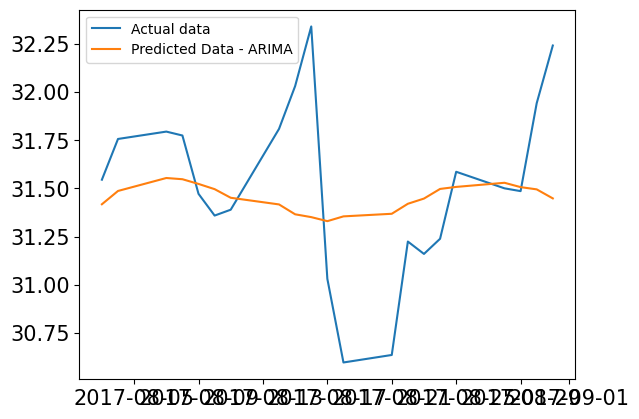

In [42]:
plt.plot(test,label='Actual data')
plt.plot(predicted_autoARIMA,label='Predicted Data - ARIMA')
plt.legend()

## SARIMAX

### Predict P,Q

In [43]:
P=range(0,6)
D=range(1,2)
Q=range(0,6)

pdq_combination=list(itertools.product(P,D,Q))

In [44]:
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [46]:
order1=[]
rmse=[]

for pdq in pdq_combination:
    try:
        model=sm.tsa.statespace.SARIMAX(train,order=(6, 1, 4),seasonal_order=(pdq[0],pdq[1],pdq[2],12)).fit()
        pred=model.predict(start=train.shape[0],end=(train.shape[0]+test.shape[0]-1),dynamic=True)
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
    except Exception as e:
        raise e

results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE']).sort_values('RMSE')
results.head(10)

,RMSE
"(3, 1, 0)",0.442969
"(0, 1, 0)",0.497455
"(2, 1, 0)",0.501340
"(3, 1, 1)",0.511722
"(0, 1, 1)",0.661987
"(2, 1, 1)",0.686326
"(1, 1, 2)",0.686333
"(0, 1, 2)",0.688304
"(1, 1, 1)",0.691534
"(0, 1, 4)",0.775542


In [47]:
model=sm.tsa.statespace.SARIMAX(data,order=(6, 1, 4),seasonal_order=(3,1,0,12)).fit()

In [48]:
predicted_SARIMA = model.predict(start=train.shape[0],end=(train.shape[0]+test.shape[0]-1),dynamic=True)
predicted_SARIMA=pd.DataFrame(predicted_SARIMA).set_index(test.index.copy())
predicted_SARIMA.head()

,predicted_mean
DATE,
2017-08-03,31.496810
2017-08-04,31.538507
2017-08-07,31.842043
2017-08-08,31.539101
2017-08-09,31.649464


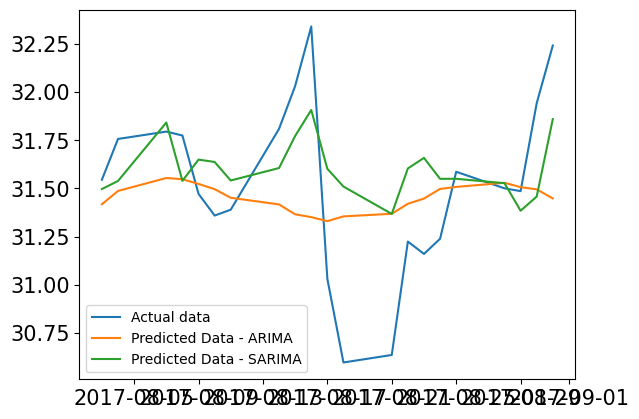

In [49]:
plt.plot(test,label='Actual data')
plt.plot(predicted_autoARIMA,label='Predicted Data - ARIMA')
plt.plot(predicted_SARIMA,label='Predicted Data - SARIMA')
plt.legend()

## Future Forecast

In [50]:
months=10
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,months+1)]
future_data=pd.DataFrame(index=future_dates[1:],columns=data.columns)
forecast=model.forecast(steps=months)
future_stocks = pd.DataFrame(forecast).set_index(future_data.index)
future_stocks.rename(columns = {'predicted_mean':'NASDAQ.CSCO'}, inplace = True)

In [51]:
data.tail()

,NASDAQ.CSCO
DATE,
2017-08-25,31.586380
2017-08-28,31.500441
2017-08-29,31.485930
2017-08-30,31.942218
2017-08-31,32.241696


In [52]:
future_data.head()

,NASDAQ.CSCO
2017-09-30,NaN
2017-10-31,NaN
2017-11-30,NaN
2017-12-31,NaN
2018-01-31,NaN


In [53]:
future_stocks.head()

,NASDAQ.CSCO
2017-09-30,32.218235
2017-10-31,31.943343
2017-11-30,31.695692
2017-12-31,31.412008
2018-01-31,31.747343


<AxesSubplot:>

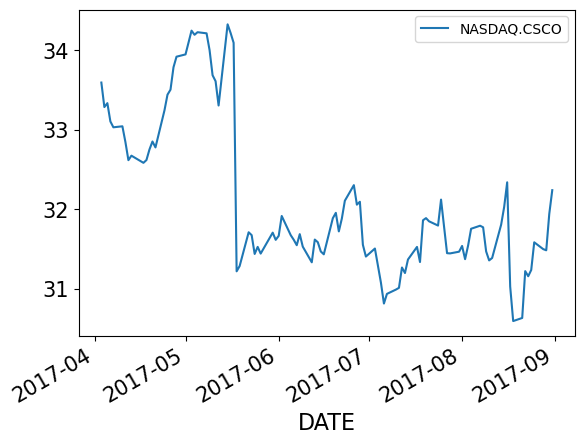

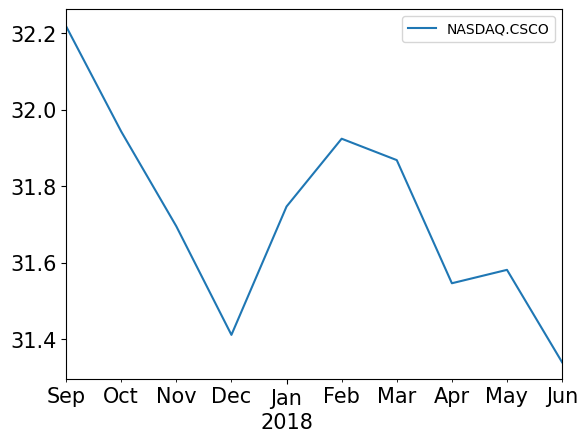

In [54]:
data.plot()
future_stocks.plot()

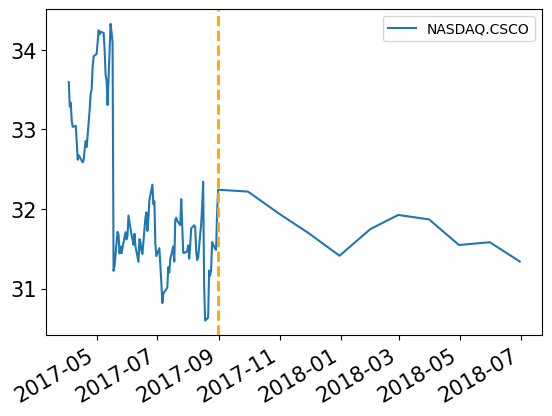

In [55]:
pd.concat([data,future_stocks]).plot()
plt.axvline('2017-08-31',color='orange',lw=2,ls='dashed')

In [56]:
future_stocks

,NASDAQ.CSCO
2017-09-30,32.218235
2017-10-31,31.943343
2017-11-30,31.695692
2017-12-31,31.412008
2018-01-31,31.747343
2018-02-28,31.924501
2018-03-31,31.868602
2018-04-30,31.546879
2018-05-31,31.581905
2018-06-30,31.340433


In [57]:
model.save('../csco.pkl')